In [1]:
%matplotlib inline

In [398]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import pydot
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from collections import Counter
from tqdm import tqdm

In [43]:
nhl_data = pd.read_csv('nhl_seasonal_data.csv')

In [44]:
nhl_data = nhl_data.drop(columns=['Unnamed: 0', 'Team'])

In [45]:
#nhl_data = pd.get_dummies(nhl_data, columns=['Pos'])
nhl_data.head()

,A,Age,Full Name,G,GP,PTS,Pos,Season
0,1,20.0,A.J. Greer,0,5,1,LW,2016-17
1,3,21.0,A.J. Greer,0,17,3,LW,2017-18
2,0,20.0,Aaron Broten,0,2,0,LW,1980-81
3,24,21.0,Aaron Broten,15,58,39,LW,1981-82
4,39,22.0,Aaron Broten,16,73,55,C,1982-83


In [46]:
positions = nhl_data['Pos']

In [47]:
counts = Counter(positions)
print(counts)

Counter({'D': 12954, 'C': 9125, 'LW': 7916, 'RW': 7472, nan: 88, 'LW/C': 27, 'C/LW': 21, 'C/RW': 16, 'RW/C': 15, 'LW/RW': 11, 'RW/LW': 6, 'RW/LW/C': 1, 'LW/RW/C': 1})


In [48]:
#for _ in tqdm(range(len(nhl_data['Season']))):
#    nhl_data['Season'][_] = int(nhl_data['Season'][_][:4])

  0%|          | 0/37653 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|██████████| 37653/37653 [1:32:02<00:00,  6.82it/s]


In [50]:
#nhl_data.to_csv('revised_nhl.csv')

In [117]:
nhl_data_rev = pd.read_csv('revised_nhl.csv')

In [118]:
nhl_data_rev = nhl_data_rev.drop(columns=['Unnamed: 0'])
nhl_data_rev.head()

,A,Age,Full_Name,G,GP,PTS,Pos,Season
0,1,20,A.J. Greer,0,5,1,LW,2016
1,3,21,A.J. Greer,0,17,3,LW,2017
2,0,20,Aaron Broten,0,2,0,LW,1980
3,24,21,Aaron Broten,15,58,39,LW,1981
4,39,22,Aaron Broten,16,73,55,C,1982


In [119]:
positions = nhl_data_rev['Pos']
counts = Counter(positions)
print(counts)

Counter({'D': 12955, 'C': 9148, 'LW': 7962, 'RW': 7588})


In [120]:
nhl_data_rev = pd.get_dummies(nhl_data_rev, columns=['Pos'])

In [121]:
nhl_data_rev.head()

,A,Age,Full_Name,G,GP,PTS,Season,Pos_C,Pos_D,Pos_LW,Pos_RW
0,1,20,A.J. Greer,0,5,1,2016,0,0,1,0
1,3,21,A.J. Greer,0,17,3,2017,0,0,1,0
2,0,20,Aaron Broten,0,2,0,1980,0,0,1,0
3,24,21,Aaron Broten,15,58,39,1981,0,0,1,0
4,39,22,Aaron Broten,16,73,55,1982,1,0,0,0


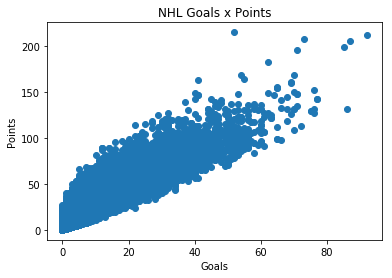

In [171]:
#ages = nhl_data_rev.G.unique()
plt.scatter(nhl_data_rev['G'], nhl_data_rev['PTS'])
plt.xlabel('Goals')
plt.ylabel('Points')
plt.title('NHL Goals x Points')
plt.show()

In [224]:
players = nhl_data_rev['Full_Name']
counts = Counter(players).most_common(5)
print(counts)

[('Mark Howe', 28), ('Mark Messier', 27), ('Chris Chelios', 26), ('Pierre Guite', 26), ('Jaromir Jagr', 24)]


In [225]:
players.head()

0      A.J. Greer
1      A.J. Greer
2    Aaron Broten
3    Aaron Broten
4    Aaron Broten
Name: Full_Name, dtype: object

In [226]:
train_data = np.array(nhl_data_rev)

In [227]:
names = []
for name in players:
    if name not in names:
        names.append(name)
names[:10]

['A.J. Greer',
 'Aaron Broten',
 'Aaron Downey',
 'Aaron Ekblad',
 'Aaron Gagnon',
 'Aaron Gavey',
 'Aaron Johnson',
 'Aaron MacKenzie',
 'Aaron Miller',
 'Aaron Ness']

In [149]:
#for name in df['Full_Name'].unique():
G = nhl_data_rev[nhl_data_rev.Full_Name == 'Justin Abdelkader']['G']
G = list(G)
G.reverse()
H = nhl_data_rev[nhl_data_rev.Full_Name == 'Tomas Tatar']['G']
H = list(H)
H.reverse()
G[:], H[:]

([13, 7, 19, 23, 10, 10, 8, 7, 3, 0, 0], [4, 25, 21, 29, 19, 4, 1])

In [150]:
while len(G) < 27:
    G.append(0)
while len(H) < 27:
    H.append(0)

In [151]:
len(G), len(H)

(27, 27)

In [166]:
U = []
U.append(G)
U.append(H)
test_df = pd.DataFrame(U)
test_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,13,7,19,23,10,10,8,7,3,0,...,0,0,0,0,0,0,0,0,0,0
1,4,25,21,29,19,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [231]:
with open('test_goal_matrix.csv', 'w+') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter =',')
    for name in tqdm(names):
        goals = []
        for row in nhl_data_rev[nhl_data_rev.Full_Name == name]['G']:
            temp = []
            goals.append(row)
            goals.reverse()
            temp.extend(goals)
#    print(len(temp))
            while (len(temp)) < 28:
#        print(True)
                temp.append(0)
            csv_writer.writerow(temp)
#    print(goals)
            goals.reverse()

100%|██████████| 6165/6165 [00:57<00:00, 107.72it/s]


In [338]:
with open('test_assist_matrix.csv', 'w+') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter =',')
    for name in tqdm(names):
        goals = []
        for row in nhl_data_rev[nhl_data_rev.Full_Name == name]['A']:
            temp = []
            goals.append(row)
            goals.reverse()
            temp.extend(goals)
#    print(len(temp))
            while (len(temp)) < 28:
#        print(True)
                temp.append(0)
            csv_writer.writerow(temp)
#    print(goals)
            goals.reverse()

100%|██████████| 6165/6165 [00:27<00:00, 227.86it/s]


In [339]:
with open('test_games_matrix.csv', 'w+') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter =',')
    for name in tqdm(names):
        goals = []
        for row in nhl_data_rev[nhl_data_rev.Full_Name == name]['GP']:
            temp = []
            goals.append(row)
            goals.reverse()
            temp.extend(goals)
#    print(len(temp))
            while (len(temp)) < 28:
#        print(True)
                temp.append(0)
            csv_writer.writerow(temp)
#    print(goals)
            goals.reverse()

100%|██████████| 6165/6165 [00:25<00:00, 242.28it/s]


In [340]:
with open('test_points_matrix.csv', 'w+') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter =',')
    for name in tqdm(names):
        goals = []
        for row in nhl_data_rev[nhl_data_rev.Full_Name == name]['PTS']:
            temp = []
            goals.append(row)
            goals.reverse()
            temp.extend(goals)
#    print(len(temp))
            while (len(temp)) < 28:
#        print(True)
                temp.append(0)
            csv_writer.writerow(temp)
#    print(goals)
            goals.reverse()

100%|██████████| 6165/6165 [00:25<00:00, 242.06it/s]


In [195]:
a = [1,2,3,4,5]
a.reverse()
a

[5, 4, 3, 2, 1]

In [345]:
goal_matrix = pd.read_csv('test_goal_matrix.csv')
assist_matrix = pd.read_csv('test_assist_matrix.csv')
games_matrix = pd.read_csv('test_games_matrix.csv')
points_matrix = pd.read_csv('test_points_matrix.csv')

In [348]:
assist_matrix.head(5)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,...,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
nhl_data_rev.head(5)

,A,Age,Full_Name,G,GP,PTS,Season,Pos_C,Pos_D,Pos_LW,Pos_RW
0,1,20,A.J. Greer,0,5,1,2016,0,0,1,0
1,3,21,A.J. Greer,0,17,3,2017,0,0,1,0
2,0,20,Aaron Broten,0,2,0,1980,0,0,1,0
3,24,21,Aaron Broten,15,58,39,1981,0,0,1,0
4,39,22,Aaron Broten,16,73,55,1982,1,0,0,0


In [241]:
len(goal_matrix), len(nhl_data_rev)

(37653, 37653)

In [349]:
full_input_matrix = pd.concat([nhl_data_rev, goal_matrix, games_matrix, points_matrix, assist_matrix], axis = 1)

In [350]:
full_input_matrix.head()

,A,Age,Full_Name,G,GP,PTS,Season,Pos_C,Pos_D,Pos_LW,...,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28
0,1,20,A.J. Greer,0,5,1,2016,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3,21,A.J. Greer,0,17,3,2017,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,20,Aaron Broten,0,2,0,1980,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,24,21,Aaron Broten,15,58,39,1981,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,39,22,Aaron Broten,16,73,55,1982,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
len(full_input_matrix)

37653

In [369]:
input_matrix = full_input_matrix.drop(columns = \
                            ['G', 'g1', 'Full_Name', 'A', 'PTS', 'GP', 'a1', 'p1', 'gm1', 'Season'])
targets = full_input_matrix['G']

In [370]:
input_matrix.head()

,Age,Pos_C,Pos_D,Pos_LW,Pos_RW,g2,g3,g4,g5,g6,...,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28
0,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,1,0,0,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [371]:
input_matrix.fillna(0, inplace=True)

In [372]:
np.any(np.isnan(input_matrix)), np.all(np.isfinite(input_matrix))

(False, True)

In [373]:
col_list = list(input_matrix.columns)
inputs = np.array(input_matrix)
labels = np.array(targets)

In [374]:
train_inputs, test_inputs, train_tgts, test_tgts = train_test_split(inputs, labels, test_size = 0.25, random_state = 69)

In [375]:
print('Training Features Shape:', train_inputs.shape)
print('Training Labels Shape:', train_tgts.shape)
print('Testing Features Shape:', test_inputs.shape)
print('Testing Labels Shape:', test_tgts.shape)

Training Features Shape: (28239, 113)
Training Labels Shape: (28239,)
Testing Features Shape: (9414, 113)
Testing Labels Shape: (9414,)


In [376]:
model = RandomForestRegressor(n_estimators = 1000, random_state = 69, verbose=True)

In [377]:
model.fit(train_inputs, train_tgts)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 13.9min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=69, verbose=True,
           warm_start=False)

In [378]:
predictions = model.predict(test_inputs)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   14.9s finished


In [379]:
errors = abs(predictions - test_tgts)

In [380]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Goals.')

Mean Absolute Error: 4.64 Goals.


In [382]:
altered_tgts = []
for num in test_tgts:
    if num != 0:
        altered_tgts.append(num)
    else:
        altered_tgts.append(1)

In [383]:
mape = 100 * (errors / altered_tgts)
accuracy = abs(100 - np.mean(mape))
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 46.62 %.


In [384]:
predictions[:9], test_tgts[:9]

(array([ 2.91378715, 10.631     , 28.738     ,  1.325     ,  1.72603653,
        31.165     ,  5.945     ,  1.27793937,  7.36349305]),
 array([ 0, 14, 37,  2,  0, 39,  3,  0, 12]))

In [404]:
importances = list(model.feature_importances_)
feature_importances = [(feature, round(importance, 4)) \
                       for feature, importance in zip(col_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: g2                   Importance: 0.597
Variable: gm2                  Importance: 0.0444
Variable: Age                  Importance: 0.0352
Variable: g3                   Importance: 0.0345
Variable: a2                   Importance: 0.0276
Variable: gm3                  Importance: 0.0243
Variable: p2                   Importance: 0.0202
Variable: a3                   Importance: 0.0191
Variable: g4                   Importance: 0.0153
Variable: p3                   Importance: 0.0151
Variable: gm4                  Importance: 0.0138
Variable: a4                   Importance: 0.0117
Variable: Pos_D                Importance: 0.0114
Variable: g5                   Importance: 0.0103
Variable: gm5                  Importance: 0.0101
Variable: p4                   Importance: 0.0099
Variable: a5                   Importance: 0.0074
Variable: p5                   Importance: 0.0068
Variable: gm6                  Importance: 0.0067
Variable: g6                   Importance: 0.0062
V

In [400]:
tree = model.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = col_list, rounded = True, precision = 1)